In [1]:
import cv2

In [2]:
from matplotlib import pyplot as plt 

In [3]:
import numpy as np

In [4]:
image = cv2.imread("201804112600031010.jpg",cv2.IMREAD_COLOR)

In [5]:
image.shape

(4694, 7321, 3)

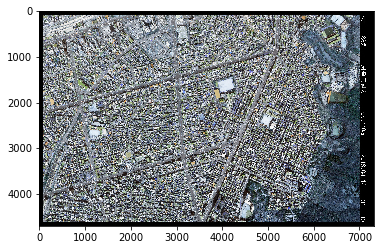

In [6]:
plt.imshow(image)

In [7]:
roi = image[1000:1500, 500:1000]

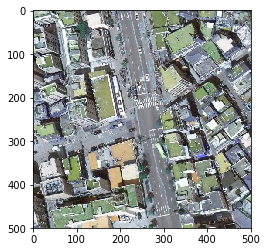

In [8]:
plt.imshow(roi)

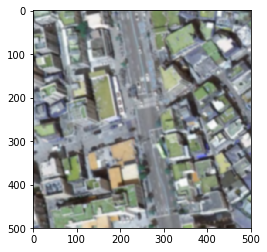

In [9]:
GB = cv2.GaussianBlur(roi,(11,11),0)

plt.imshow(GB)

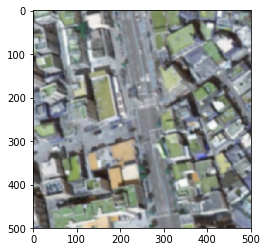

In [10]:
blur = cv2.blur(GB,(2,2),0)

plt.imshow(blur)

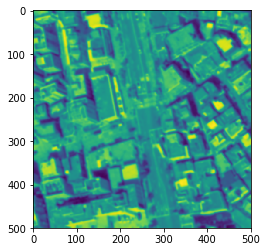

In [11]:
gray = cv2.cvtColor(GB, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)

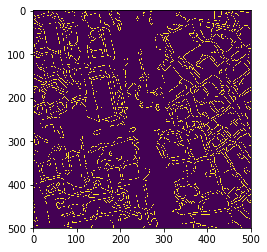

In [12]:
canny = cv2.Canny(gray, 30, 150)

plt.imshow(canny)

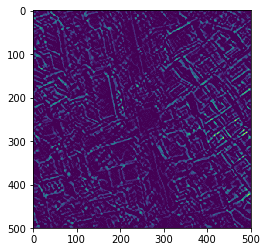

In [13]:
sobel = cv2.Sobel(gray, cv2.CV_8U, 1, 1, 3)

plt.imshow(sobel)

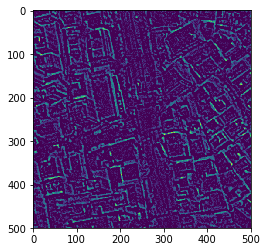

In [14]:
laplacian = cv2.Laplacian(gray, cv2.CV_8U, ksize=1)

plt.imshow(laplacian)

In [243]:
#ret,img_binary = cv2.threshold(gray, 4, 70, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

In [15]:
pts = np.argwhere(canny>0)
y1,x1 = pts.min(axis=0)
y2,x2 = pts.max(axis=0)

In [103]:
#contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [58]:
minLineLength = 50
maxLineGap = 10

In [277]:
#lines = cv2.HoughLines(laplacian,1,np.pi/180,100)

In [278]:
image2 = roi.copy()

In [281]:
#plt.rcParams["figure.figsize"] = (20,20)

In [88]:
!python -V

Python 3.7.3


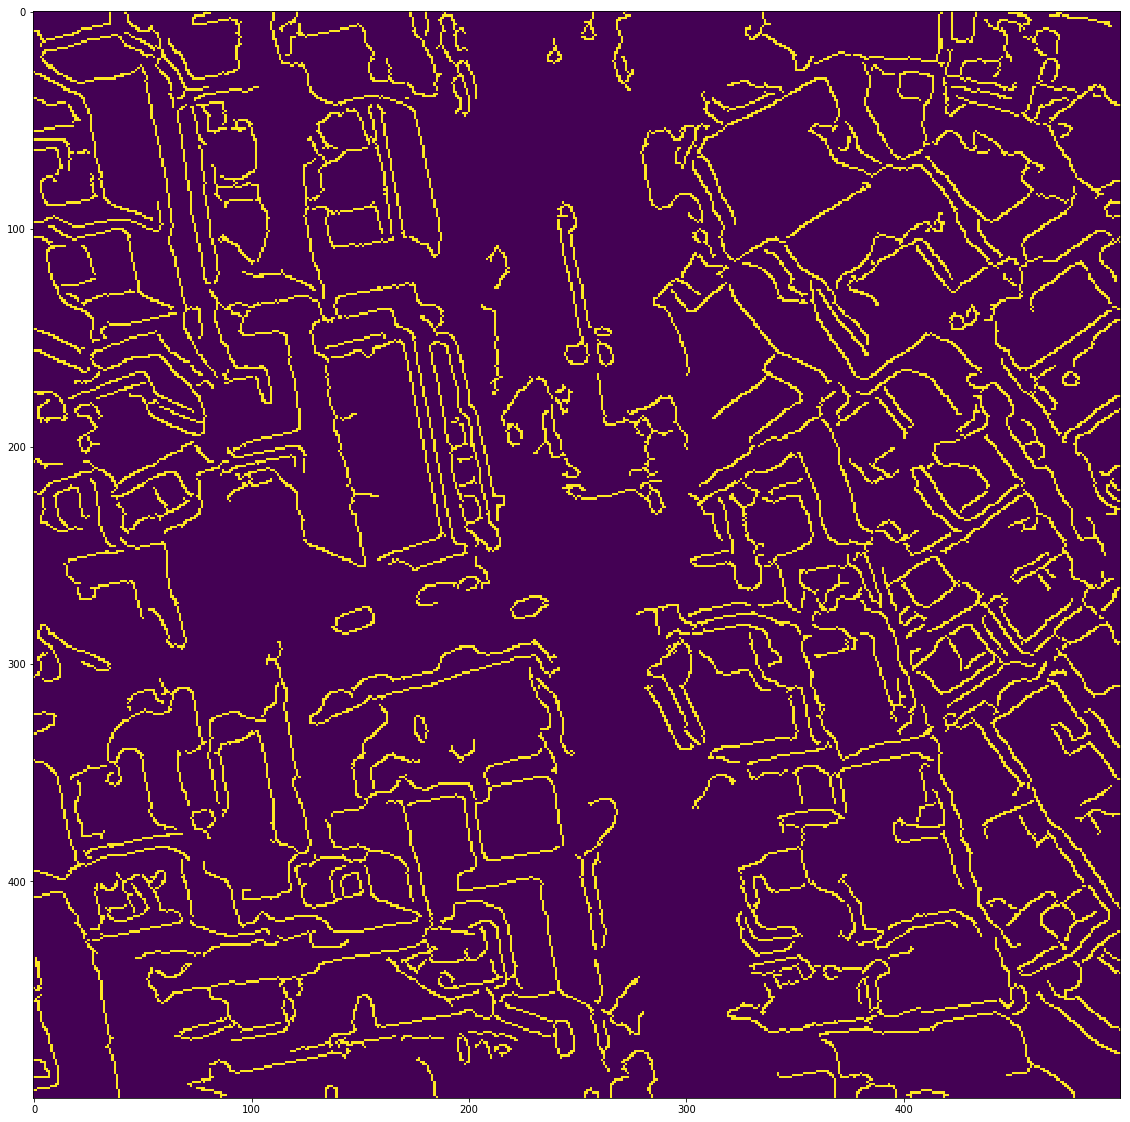

In [282]:
ret, img_binary = cv2.threshold(canny, 127, 255, 0)
plt.imshow(img_binary)

In [283]:
#contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [284]:
#ret, img_binary = cv2.threshold(canny, 127, 255, 0)

In [285]:
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [413]:
roi2 = roi.copy()

In [451]:
res_list = []

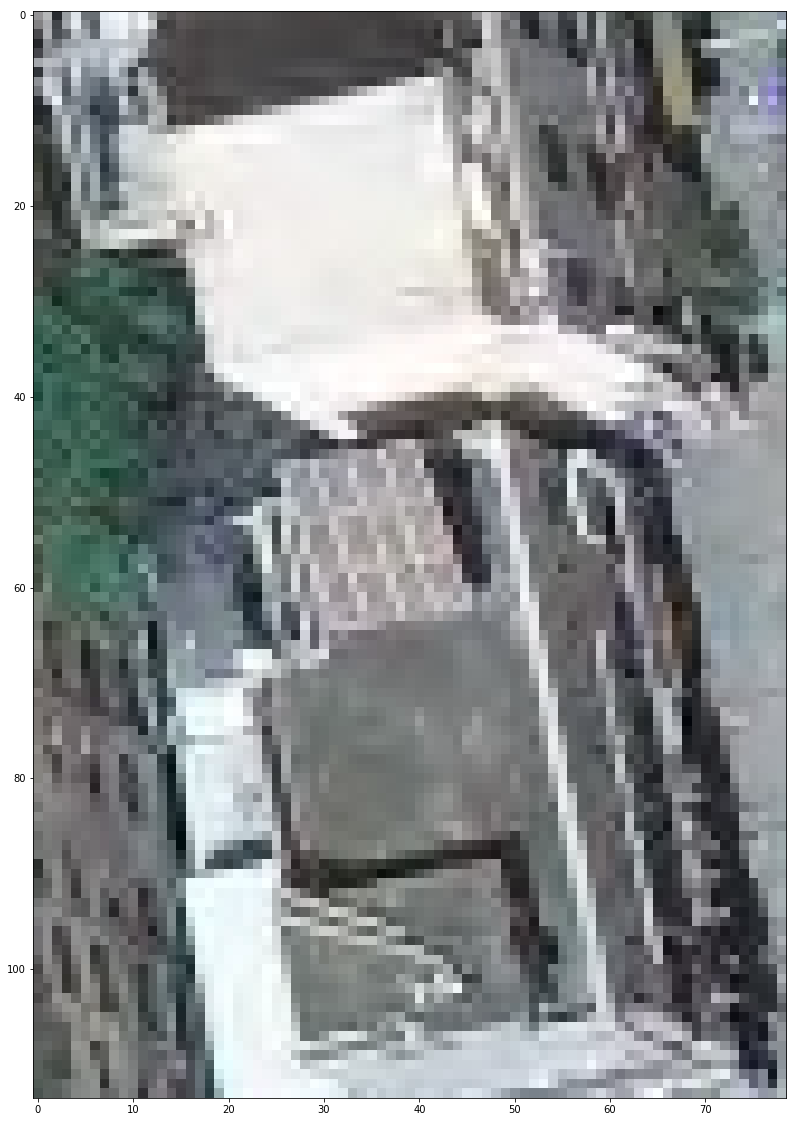

In [455]:
#count = 0
for cnt in contours:
    #cv2.drawContours(roi, [cnt], 0, (255, 0, 0), 3)  # blue
    if cv2.contourArea(cnt) < 1500: 
        cv2.drawContours(roi2, [cnt], -1, 255, -1)
        x,y,w,h = cv2.boundingRect(cnt)
        if w>50 and h>50:
            res_list.append(roi[y: y + h, x: x + w])
            plt.imshow(roi[y: y + h, x: x + w])


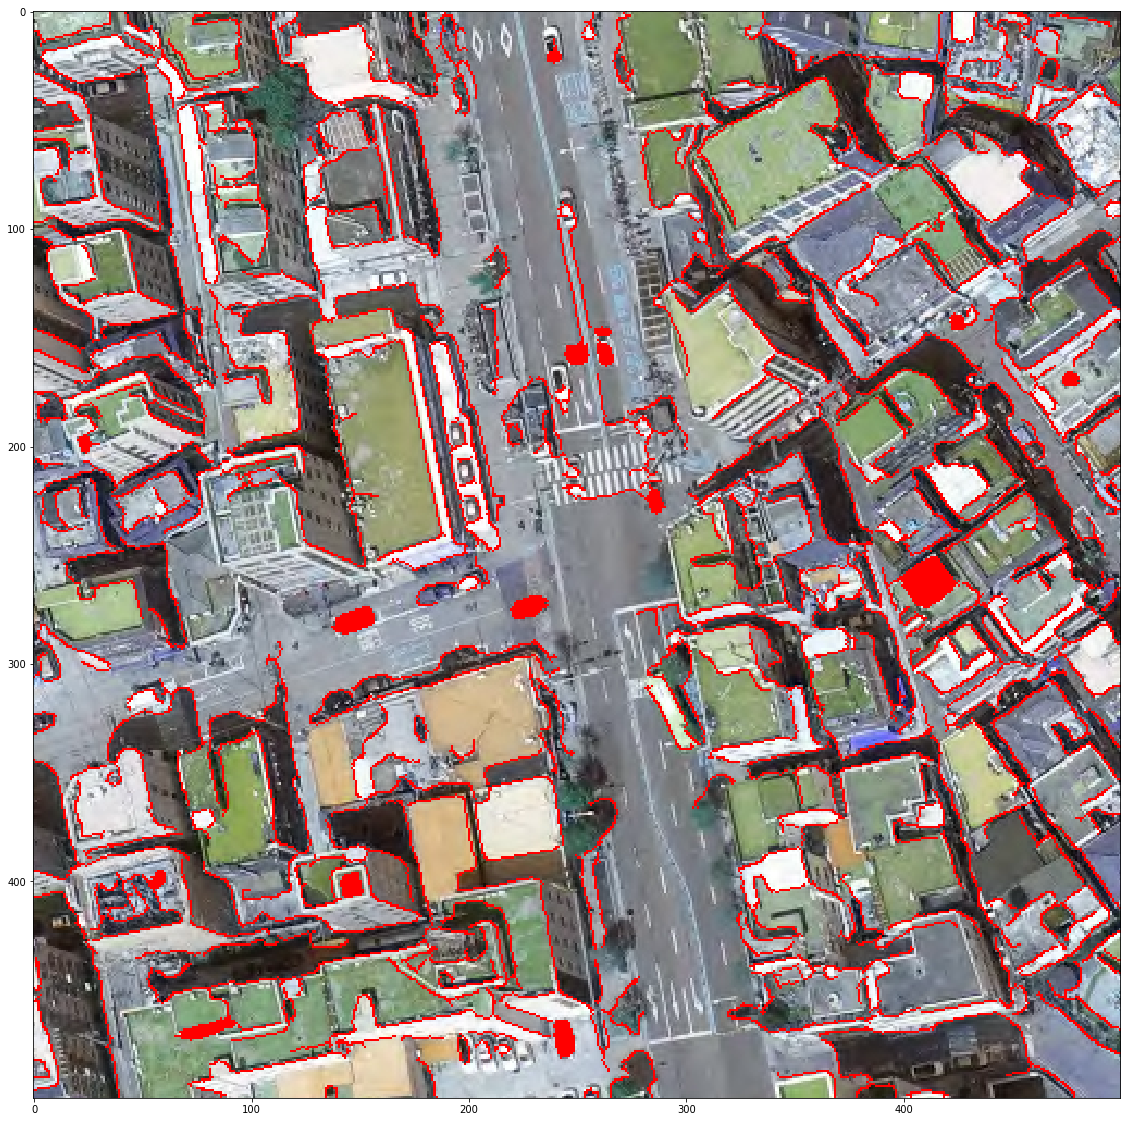

In [430]:
plt.imshow(roi2)

In [379]:
mask = cv2.erode(roi2, None, iterations=2)
#mean = cv2.mean(image, mask=mask)[:3]

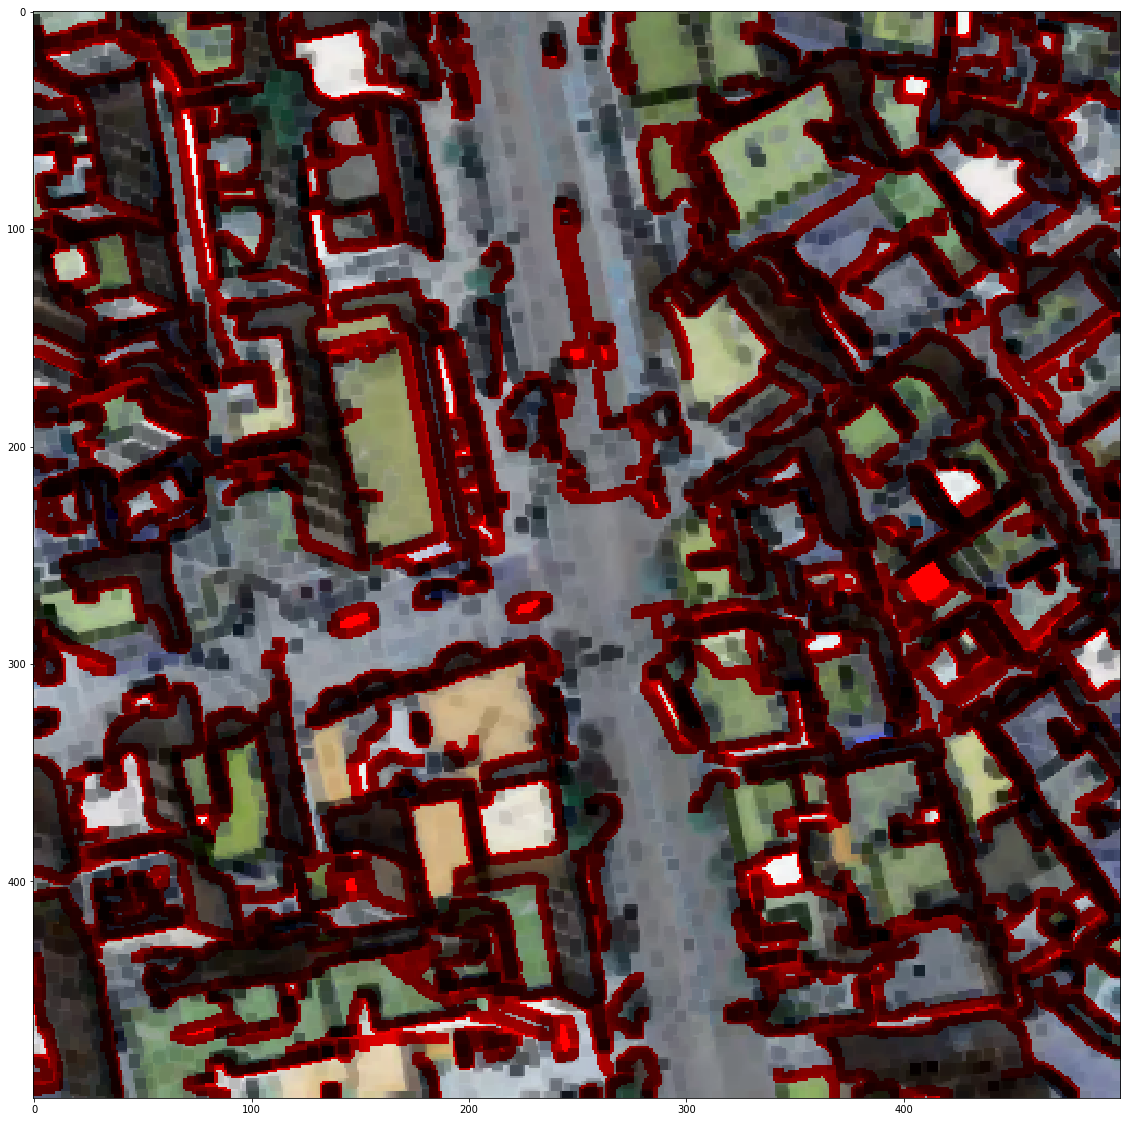

In [396]:
plt.imshow(mask)

In [405]:
out = np.zeros_like(mask)

In [406]:
out[mask == [0,0,0]] = roi2[mask == [0,0,0]]

In [418]:
mask_out=cv2.subtract(mask,roi2)

In [420]:
mask_out=cv2.subtract(mask,mask_out)

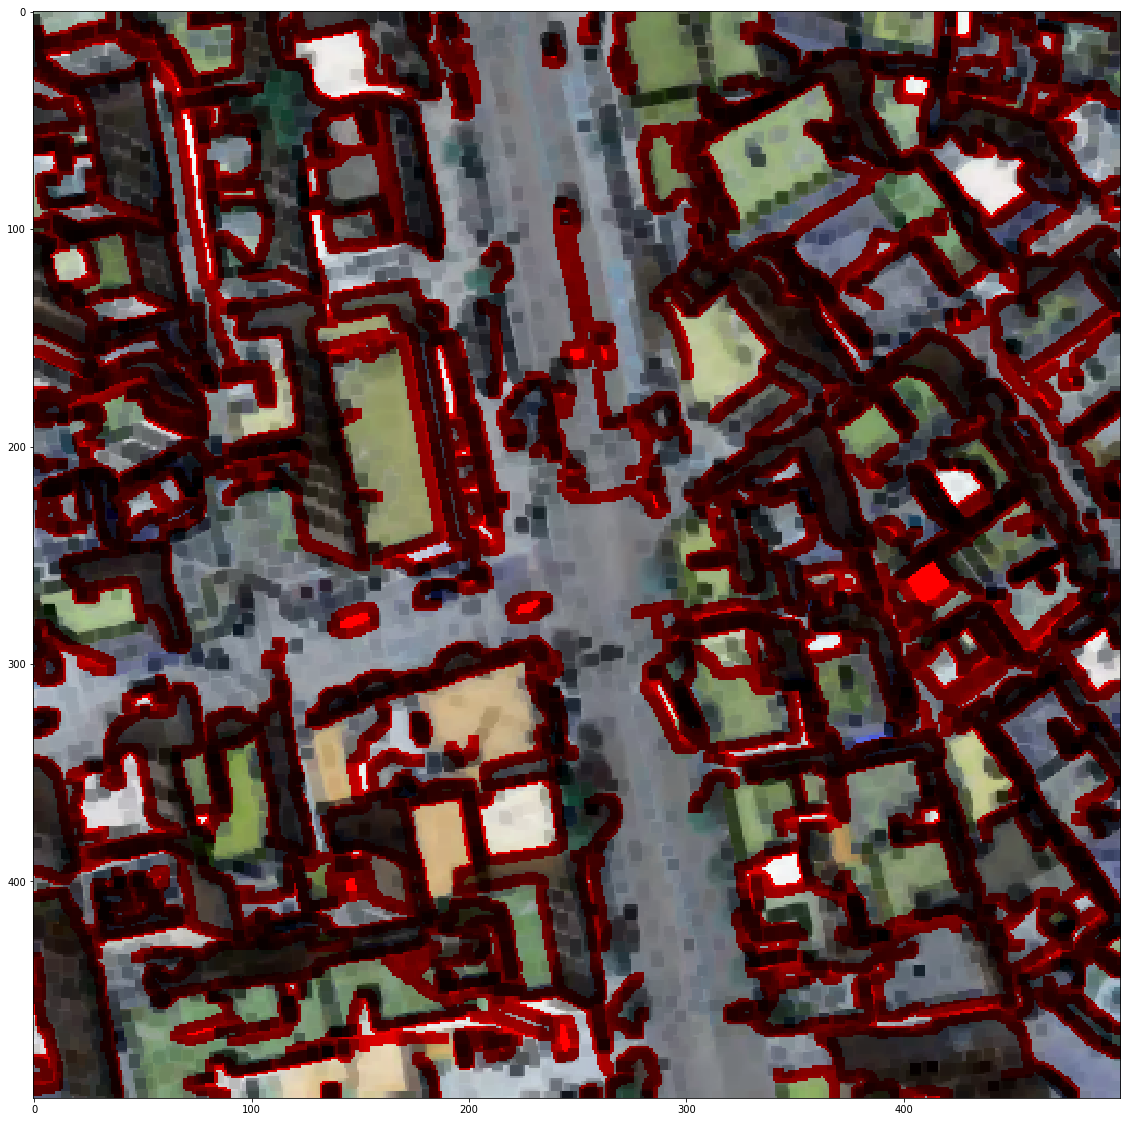

In [456]:
plt.imshow(mask_out)

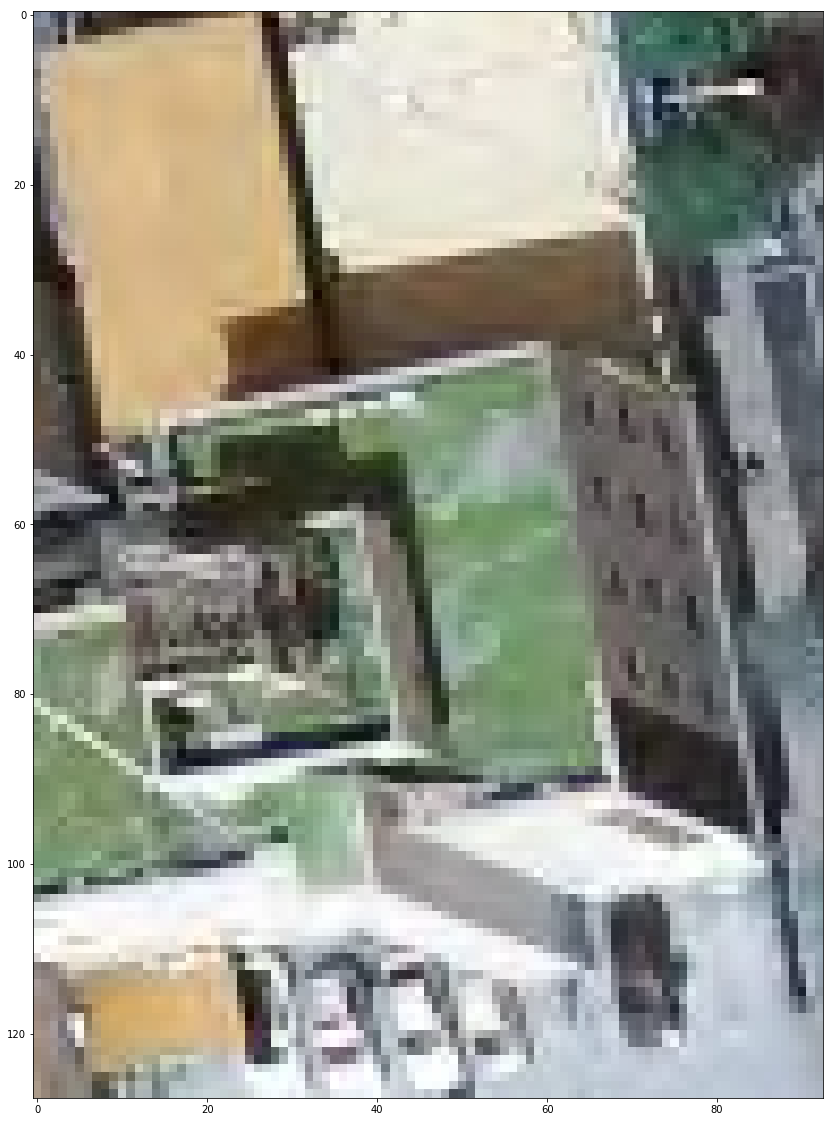

In [457]:
plt.imshow(res_list[0])